In [1]:
#Import the needed libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# transform the excel file to csv
df = pd.read_csv("superstore1.csv", encoding='iso-8859-1')

In [3]:
# checking the data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Checking for missing data

for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing_data))

Row ID - 0.0%
Order ID - 0.0%
Order Date - 0.0%
Ship Date - 0.0%
Ship Mode - 0.0%
Customer ID - 0.0%
Customer Name - 0.0%
Segment - 0.0%
Country - 0.0%
City - 0.0%
State - 0.0%
Postal Code - 0.0%
Region - 0.0%
Product ID - 0.0%
Category - 0.0%
Sub-Category - 0.0%
Product Name - 0.0%
Sales - 0.0%
Quantity - 0.0%
Discount - 0.0%
Profit - 0.0%


In [5]:
# Data types for our columns
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [6]:
# changing the sales data type to integer

df['Sales'] = df['Sales'].astype('int64')
df['Profit'] = df['Profit'].astype('int64')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261,2,0.00,41
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731,3,0.00,219
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14,2,0.00,6
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957,5,0.45,-383
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22,2,0.20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25,3,0.20,4
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91,2,0.00,15
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258,2,0.20,19
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29,4,0.00,13


In [7]:
# Adding a new column for the year value only 
df['OrderYear'] = pd.DatetimeIndex(df['Order Date']).year
df['ShipYear'] = pd.DatetimeIndex(df['Ship Date']).year

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrderYear,ShipYear
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261,2,0.00,41,2016,2016
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731,3,0.00,219,2016,2016
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14,2,0.00,6,2016,2016
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957,5,0.45,-383,2015,2015
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22,2,0.20,2,2015,2015


In [8]:
# Sorting the data by profit
df.sort_values(by =['Profit'], inplace = False, ascending = False)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrderYear,ShipYear
6826,6827,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499,5,0.0,8399,2016,2016
8153,8154,CA-2017-140151,3/23/2017,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999,4,0.0,6719,2017,2017
4190,4191,CA-2017-166709,11/17/2017,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499,3,0.0,5039,2017,2017
9039,9040,CA-2016-117121,12/17/2016,12/21/2016,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,...,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892,13,0.0,4946,2016,2016
4098,4099,CA-2014-116904,9/23/2014,9/28/2014,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,...,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449,5,0.0,4630,2014,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,4992,US-2017-122714,12/7/2017,12/13/2017,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,...,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889,5,0.8,-2929,2017,2017
3011,3012,CA-2017-134845,4/17/2017,4/23/2017,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,...,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549,5,0.7,-3399,2017,2017
9774,9775,CA-2014-169019,7/26/2014,7/30/2014,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177,8,0.8,-3701,2014,2014
683,684,US-2017-168116,11/4/2017,11/4/2017,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999,4,0.5,-3839,2017,2017


In [9]:
# Check all the data instead of a sample -> check previous cell for results
pd.set_option('display.max_rows', None)

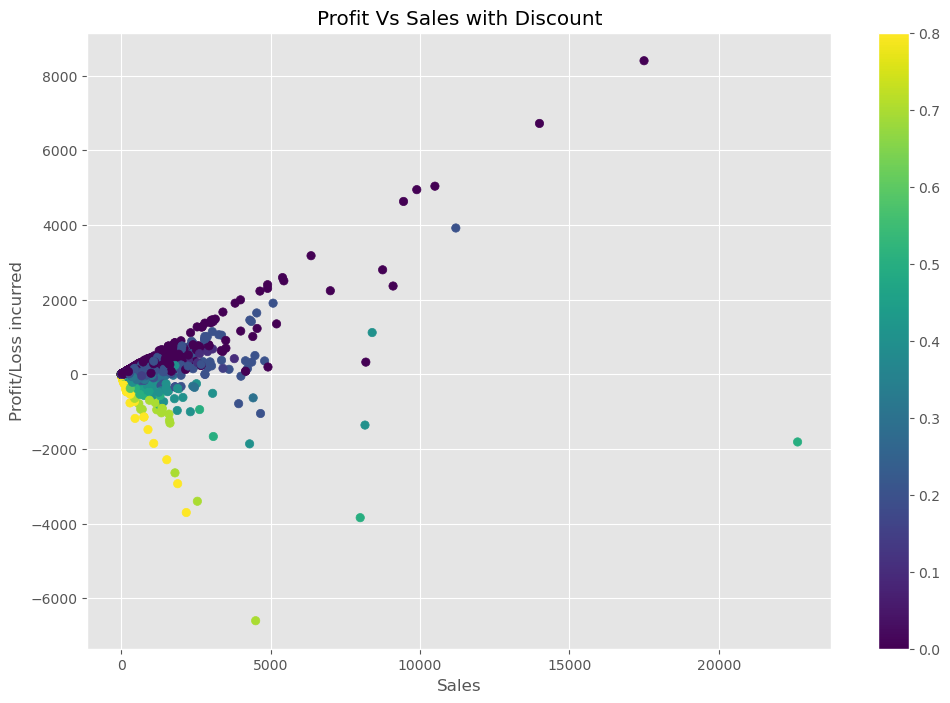

In [10]:
# Scatterplot with profit vs sales with each data point colored according to the discount value.

plt.scatter(x=df['Sales'], y=df['Profit'], c=df['Discount'])
plt.title('Profit Vs Sales with Discount')
plt.xlabel('Sales')
plt.ylabel('Profit/Loss incurred')
plt.colorbar()
plt.show()


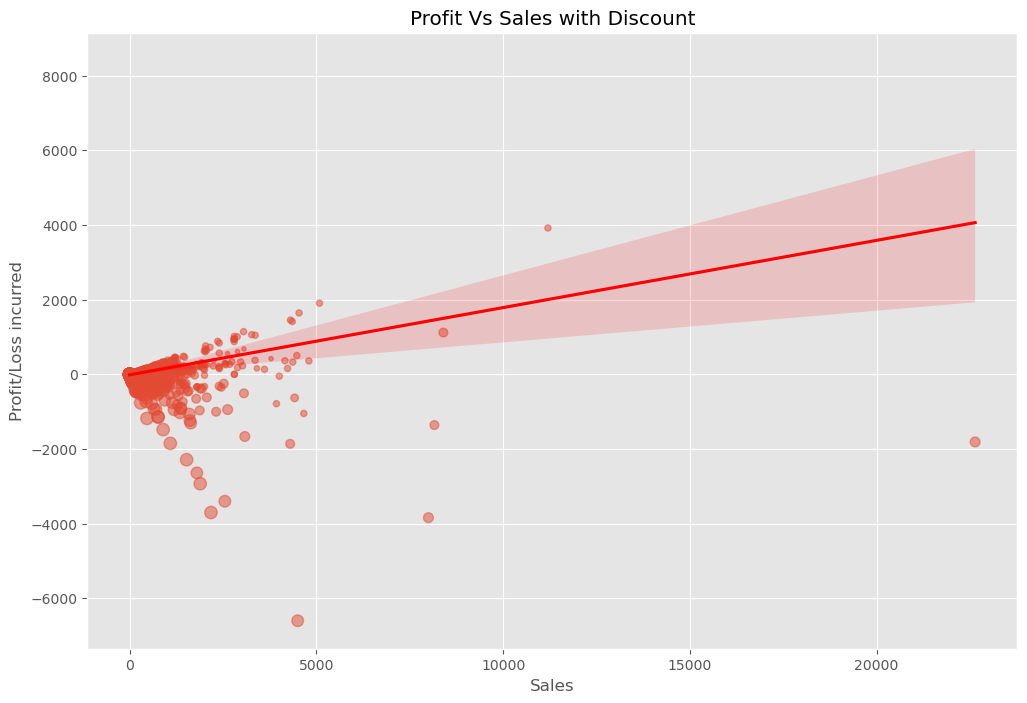

In [11]:
# showing the relationship between sales, profit, discount

df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')

sns.regplot(x='Sales', y='Profit', data=df, scatter_kws={"s": df['Discount']*100, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Profit Vs Sales with Discount')
plt.xlabel('Sales')
plt.ylabel('Profit/Loss incurred')
plt.show()



In [13]:
# Let's start looking at correlation 
df.corr(method='pearson')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,OrderYear,ShipYear
Row ID,1.000000,0.009671,-0.001360,-0.004016,0.013480,0.012526,0.015430,0.015773
Postal Code,0.009671,1.000000,-0.023843,0.012761,0.058443,-0.029960,0.004299,0.005024
Sales,-0.001360,-0.023843,1.000000,0.200834,-0.028143,0.479242,-0.009676,-0.010813
Quantity,-0.004016,0.012761,0.200834,1.000000,0.008623,0.066275,-0.005810,-0.006716
Discount,0.013480,0.058443,-0.028143,0.008623,1.000000,-0.218287,-0.002662,-0.002279
Profit,0.012526,-0.029960,0.479242,0.066275,-0.218287,1.000000,0.004663,0.004524
OrderYear,0.015430,0.004299,-0.009676,-0.005810,-0.002662,0.004663,1.000000,0.994083
ShipYear,0.015773,0.005024,-0.010813,-0.006716,-0.002279,0.004524,0.994083,1.000000


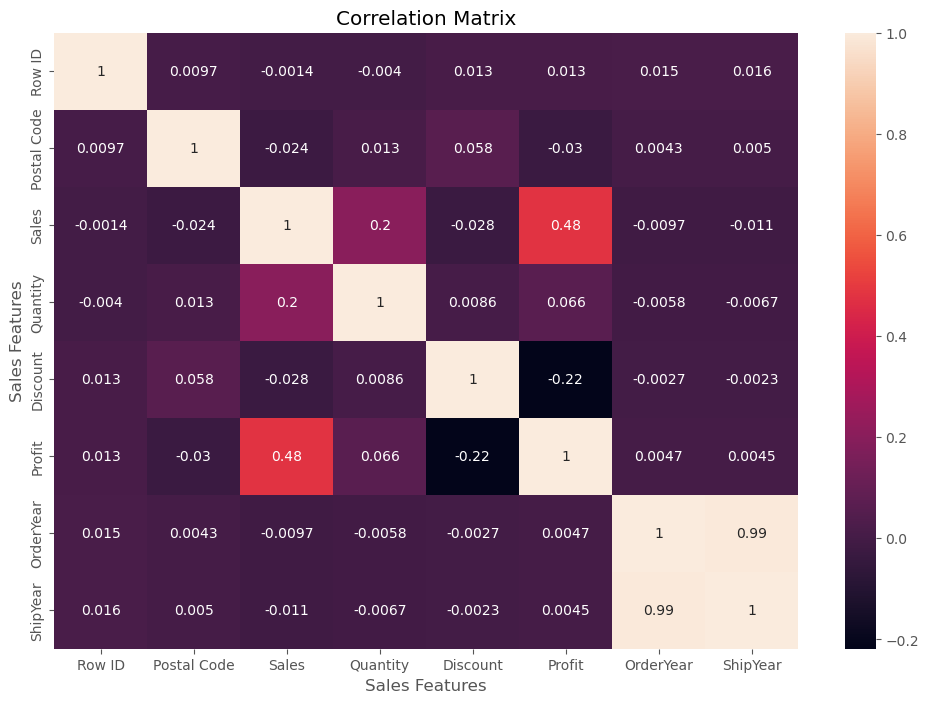

In [14]:
# showing the correlation 

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Sales Features')
plt.ylabel('Sales Features')
plt.show()